In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
# IMG_FILEPATH = "../../01_deep-learning-from-scratch/images/04_extensions/"

# matplotlib 폰트설정
#plt.rc('font', family='NanumGothicOTF') # For MacOS
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


# Tanh와 그 도함수

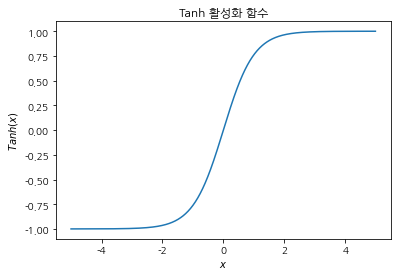

In [6]:
a = np.arange(-5, 5, 0.01)
plt.plot(a, np.tanh(a))
plt.title("Tanh 활성화 함수")
plt.xlabel("$x$")
plt.ylabel("$Tanh(x)$");
# plt.savefig(IMG_FILEPATH + "05_tanh_activation.png")

In [7]:
(a[501] - a[500]) / 0.01

0.9999999999999787

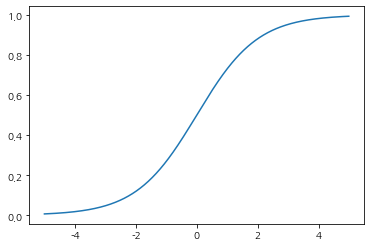

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

a = np.arange(-5, 5, 0.01)
plt.plot(a, sigmoid(a));

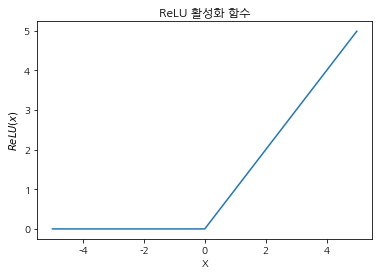

In [9]:
def relu(x):
    return np.array([el if el > 0 else 0 for el in x])

a = np.arange(-5, 5, 0.01)
plt.plot(a, relu(a))
plt.title("ReLU 활성화 함수")
plt.xlabel("X")
plt.ylabel("$ReLU(x)$");
# plt.savefig(IMG_FILEPATH + "04_relu_activation.png")

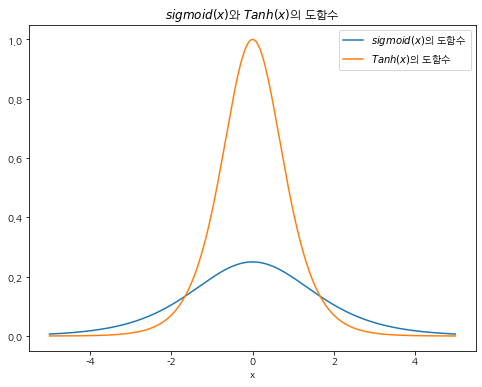

In [10]:
a = np.arange(-5, 5, 0.01)
plt.figure(figsize=(8,6))
plt.plot(a, sigmoid(a) * (1-(sigmoid(a))))
plt.plot(a, 1 - (np.tanh(a) **2))
plt.legend(['$sigmoid(x)$의 도함수', 
            '$Tanh(x)$의 도함수'])
plt.title("$sigmoid(x)$와 $Tanh(x)$의 도함수")
plt.xlabel("x");
# plt.savefig(IMG_FILEPATH + "06_sigmoid_tanh_derivative.png")

# 교차 엔트오피 / 소프트맥스

$$ \text{CE}(p_i, y_i) = - y_i * \text{log}(p_i) - (1 - y_i) * \text{log}(1-p_i) $$

$$ CE(x, 0) = \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

$$ \begin{align} = &\sum_{i}{(- 0 * log(p_i) - (1 - 0) * log(1-p_i))} \\
=  &\sum_{i}{- log(1-p_i)} \end{align}$$

$$ CE(x, 1) = \sum_{i}{(- y_i * log(p_i) - (1 - y_i) * log(1-p_i))} $$

$$ \begin{align} = &\sum_{i}{(- 1 * log(p_i) - (1 - 1) * log(1-p_i))} \\
=  &\sum_{i}{- log(p_i)} \end{align}$$

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

$$ S(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}} \\
\ldots \\
\frac{e^{x_n}}{e^{x_1} + e^{x_2} + e^{x_3} + \ldots + e^{x_n}}
\end{bmatrix} $$

$$ {SCE}_1 = - y_1 * log(\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) - (1 - y_1) * log(1-\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) $$

$$ \text{softmax}(\begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} $$

# $y_i = 0$에 대한 로그 손실

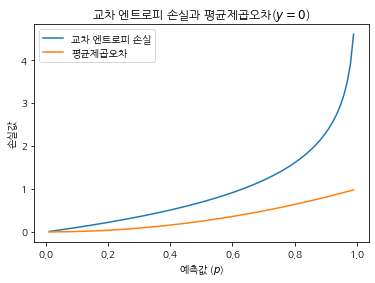

In [11]:
x = np.linspace(0.01, 0.99, 99)
y1 = -1.0 * np.log(1 - x)
y2 = (x - 0) ** 2
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['교차 엔트로피 손실', '평균제곱오차'])

plt.title("교차 엔트로피 손실과 평균제곱오차($y = 0$)")
plt.xlabel("예측값 ($p$)")
plt.ylabel("손실값");
# plt.savefig(IMG_FILEPATH + "04_Log_loss_vs_MSE_y_eq_0.png")

이론적으로는 $y=0$이면 $p$가 1에 가까워질수록 손실도 무한에 가까워진다.

# $y_i = 1$에 대한 로그 손실

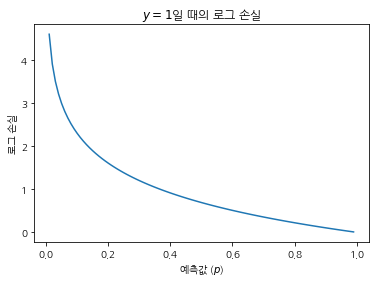

In [12]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("$y = 1$일 때의 로그 손실")
plt.xlabel("예측값 ($p$)")
plt.ylabel("로그 손실");

# 소프트맥스 교차 엔트로피 함수의 도함수 유도(2가지인 간단한 경우)

$$ C(p, y) = - y * \text{log}(p) - (1 - y) * \text{log}(1-p) $$

$$
C(p,y)=
\begin{cases}
-log(1-p) & \text{if }  y = 0\\
-log(p) & \text{if }  y = 1
\end{cases}
$$

$$ \text{SCE}(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix}, \begin{bmatrix} y_1 \\ y_2 \end{bmatrix})_1 = - y_1 * log(S(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix})_1) - (1 - y_1) * log(1-S(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix})_1) = - y_1 * log(\frac{e^{p_1}}{e^{p_1} + e^{p_2}}) - (1 - y_1) * log(1-\frac{e^{p_1}}{e^{p_1} + e^{p_2}}) $$

Structure:

$ y_1 = a $, $e^{x_2} = b$

$$ SC(x_1) = - a * log(\frac{e^{x_1}}{e^{x_1} + b}) - (1 - a) * log(1-\frac{e^{x_1}}{e^{x_1} + b}) $$

**몫 규칙:**

$$ f(x) = \frac{g(x)}{h(x)} $$ 

$$ f'(x) = \frac{g'(x) * h(x) - g(x) * h'(x)}{(h(x))^2} $$

다음과

$$ f(x) = \frac{e^x}{e^x + b} $$ 

$$ \begin{align} f'(x) =& \frac{e^x * (e^x + b) - (e^x * e^x)}{(e^x + b)^2} \\ 
=& \frac{e^x * (e^x + b - e^ x)}{(e^x + b)^2} \\
=& \frac{e^x * b}{(e^x + b)^2}\end{align} $$

다음을 만족하면

$$ g(x) = - a * log(f(x)) - (1 - a) * log(1-f(x)) $$

다음이 성립한다.

$$ g'(x) = - a * \frac{f'(x)}{f(x)} - (1 - a) * \frac{-1 * f'(x)}{1-f(x)} $$

먼저 $\frac{f'(x)}{f(x)}$ 를 계산한다.

$$ \begin{align} 
\frac{f'(x)}{f(x)} =& \frac{\frac{e^x * b}{(e^x + b)^2}}{\frac{e^x}{e^x + b}} \\\\
=& \frac{-e^x * b}{(e^x + b)^2} * \frac{e^x + b}{e^x}
 \\
=& \frac{b}{e^x + b} \end{align} $$

그리고 아래와 같은 사실을 이용한다.

$$ \frac{b}{e^x + b} = 1 - \frac{e^x}{e^x + b} $$

$ \begin{align} 
\frac{-1 * f'(x)}{1 - f(x)} =& \frac{-1 * \frac{e^x * b}{(e^x + b)^2}}{1 - \frac{e^x}{e^x + b}} \\
=& \frac{\frac{-e^x * b}{(e^x + b)^2}}{\frac{b}{e^x + b}} \\
=& \frac{-e^x * b}{(e^x + b)^2} * \frac{e^x + b}{b}
 \\
=& \frac{-e^x}{e^x + b} \end{align}$

마지막으로 모든 식을 합치면

$$ \begin{align} SC'(x) =& - a * \frac{f'(x)}{f(x)} - (1 - a) * \frac{-1 * f'(x)}{1-f(x)} \\ 
=& -a * \frac{b}{e^x + b} - (1 - a) * \frac{-e^x}{e^x + b} \\ 
=& -a * \frac{b}{e^x + b} + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\ 
=& -a * (1 - \frac{e^x}{e^x + b}) + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\
=& -a + a * \frac{e^x}{e^x + b} + \frac{e^x}{e^x + b} - a * \frac{-e^x}{e^x + b} \\
=& -a + \frac{e^x}{e^x + b} \\
\end{align} \\ 
$$

소프트맥스 층에서 역방향으로 전달되는 도함수는 다음과 같이 간단하다.

$$ S - Y = s(\begin{bmatrix} p_1 \\ p_2 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} = \begin{bmatrix} \frac{e^{p_1}}{e^{p_1} + e^{p_2}} - y_1 \\ \frac{e^{p_2}}{e^{p_1} + e^{p_2}} - y_2 \end{bmatrix} $$

그리고 다음과 같은 근거를 볼 때, 이 도함수가 옳음을 알 수 있다.

* softmax 함수의 출력은 항상 0부터 1사이의 값이다.
* $y_i$가 0이면, $ s(x_1) - y_1 $는 양수가 된다. $x_1$를 증가시키면 손실값도 증가하기 때문이다. $y_i = 1$이면 반대가 성립한다. 
* Note that this loss function only makes sense because $ s(x_i) $ is always between 0 and 1. 
* $ s(x_i) $가 항상 0과 1사이의 값을 갖기 때문에 이 손실함수가 성립한다.

텐서플로에 'softmax_cross_entropy_with_logits'라는 함수가 있는 것도 이 때문이다.

# 안정적인 소프트맥스

$$ log(softmax(x_j)) = log(\frac{e^{x_j}}{\sum_i^n e^{x_j}}) = x_j - logsumexp(X) $$

$$ softmax(x_j) = e^{log(softmax(x_j))} = e^{x - logsumexp(x)} $$

$$ logsumexp(X) = log(\sum_i^n e^{x_i}) = c + log(\sum_i^n e^{x_i - c}) $$

# 원-핫 인코딩

$$ [0, 2, 1] \Rightarrow \begin{bmatrix} 1 & 0 & 0 & \ldots & 0 \\ 0 & 0 & 1 & \ldots & 0 \\ 0 & 1 & 0 & \ldots & 0 \end{bmatrix} $$ 

# 학습률 감쇠

## 선형 감쇠

$$ \alpha_{t} = \alpha_{start} - (\alpha_{start} - \alpha_{end}) * \frac{t}{N} $$

## 지수적 감쇠

$$ \alpha_{t} = \alpha_{start} * ((\frac{\alpha_{end}}{\alpha_{start}})^\frac{1}{N})^t $$

# 확률적 경사 하강법의 모멘텀 계산식

$ \text{update} = \nabla_t + \mu * \nabla_{t-1} + \mu^2 * \nabla_{t-2} + \ldots $

# 가중치 초기화

## 특징 수를 이용한 초기화

$ f_n = w_{1, n}* x_1 + \ldots + w_{784, n}* x_{784} + b_n $

$ \text{Var}(w_{i,j}) = 1 $

$ \text{Var}(X_1 + X_2) = \text{Var}(X_1) + \text{Var}(X_2) $

In [14]:
n_feat = 784
n_hidden = 256

np.random.seed(190131)

In [15]:
a = np.random.randn(1, n_feat)

In [16]:
b = np.random.randn(n_feat, n_hidden)

In [17]:
out = np.dot(a, b).reshape(n_hidden)

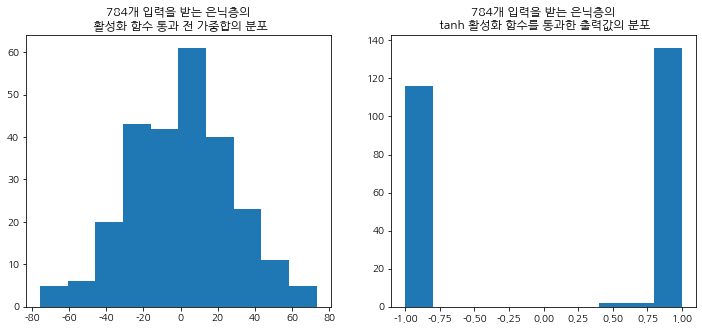

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(out)
ax[0].set_title("784개 입력을 받는 은닉층의\n 활성화 함수 통과 전 가중합의 분포")
ax[1].hist(np.tanh(out))
ax[1].set_title("784개 입력을 받는 은닉층의\n tanh 활성화 함수를 통과한 출력값의 분포");
# fig.savefig(IMG_FILEPATH + "01_weight_init_activation_illustration.png")